In [1]:
import numpy as np
import pandas as pd

from pydob.database import get_query_as_df
from pydob.exploratory import (convert_year_month_to_labels, savefig)
from indoorplants.analysis import features


import matplotlib.pyplot as plt
from pydob.settings import nt_style, nt_blue, nt_black

In [2]:
%matplotlib inline
plt.style.use(nt_style)

# 1 data retrieval

In [3]:
sql = 'select * from violations_dob limit 1;'

In [4]:
columns = get_query_as_df(sql).T.index

In [5]:
sorted(columns)

['bin',
 'block',
 'boro',
 'description',
 'device_number',
 'disposition_comments',
 'disposition_date',
 'ecb_number',
 'house_number',
 'isn_dob_bis_viol',
 'issue_date',
 'issue_date_month',
 'issue_date_quarter',
 'issue_date_year',
 'lot',
 'number',
 'street',
 'violation_category',
 'violation_number',
 'violation_type',
 'violation_type_code']

In [6]:
[c for c in columns if "pena" in c]

[]

In [7]:
sql = 'select isn_dob_bis_viol, issue_date_year, issue_date_month from violations_dob'

In [8]:
violations_dob= get_query_as_df(sql)

In [9]:
violations_dob.head()

,isn_dob_bis_viol,issue_date_year,issue_date_month
0,1603651,2011,8
1,781227,2001,12
2,1101581,2006,8
3,976367,2004,10
4,1086581,2005,10


`ISN_DOB_BIS_VIOL` :An internal code that serves as a unique value.

# 2. High-level Analysis

In [10]:
violations_to_plot = violations_dob[
                    ["issue_date_year", 
                     "issue_date_month"]
                        ].groupby(
                            ["issue_date_year", 
                             "issue_date_month"]
                            ).size()

In [11]:
violations_to_plot= violations_to_plot.loc[2000:2019].to_frame()

In [12]:
violations_to_plot= convert_year_month_to_labels(table=violations_to_plot,
                                                 month_col='issue_date_month',
                                                 year_col='issue_date_year')

In [13]:
violations_to_plot.columns = ['issue_date_year','issue_date_month','number_of_violations']

In [14]:
peak_inds, trough_inds = features.get_peak_and_trough_indices_simple(violations_to_plot.number_of_violations)

In [15]:
peaks = violations_to_plot.number_of_violations.iloc[peak_inds]

In [16]:
peaks_important = peaks.loc[peaks > 10**4]

In [17]:
violations_to_plot.number_of_violations = violations_to_plot.number_of_violations / 1000 

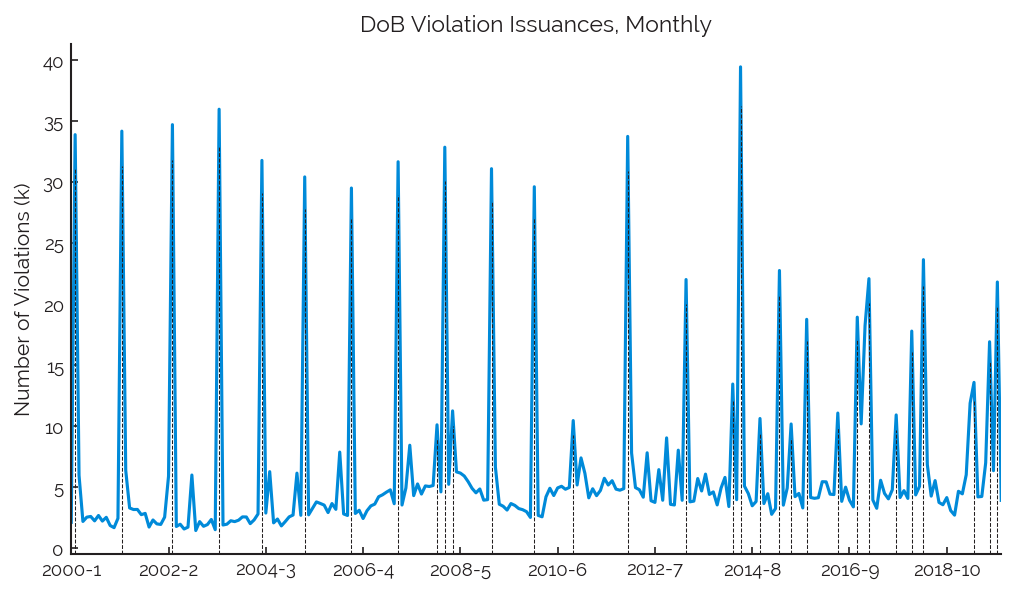

In [ ]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

violations_to_plot.number_of_violations.plot(color=nt_blue)

y_ticks = ax.get_yticks()
max_y_val = y_ticks[-1]

for date, val in peaks_important.iteritems():
    x = violations_to_plot.index.get_loc(date)
    y = violations_to_plot.loc[date, "number_of_violations"]
    
    ax.axvline(x, ymax=y / max_y_val, color=nt_black, linestyle="--", linewidth=".5")

ax.title.set_text("DoB Violation Issuances, Monthly")
ylab = ax.set_ylabel("Number of Violations (k)")
xlab = ax.set_xlabel(None)

savefig("violation_spikes.png", fig, bottom=.2)

In [95]:
pd.options.display.max_rows = 250

In [108]:
first_half = violations_to_plot.loc[
                        slice("2000-1", "2009-12"), :
                              ].number_of_violations.to_frame(
                                                   ).reset_index()

In [118]:
first_half.columns = ["date_1", "num_1"]

In [110]:
second_half = violations_to_plot.loc[
                        slice("2010-1", "2019-12"), :
                              ].number_of_violations.to_frame(
                                                   ).reset_index()

In [115]:
second_half.columns = ["date_2", "num_2"]

In [119]:
joined = first_half.join(second_half, how="outer")

In [120]:
joined

,date_1,num_1,date_2,num_2
0,2000-1,2.123,2010-1,2.690
1,2000-2,33.905,2010-2,2.576
2,2000-3,5.972,2010-3,4.211
3,2000-4,2.193,2010-4,4.916
4,2000-5,2.546,2010-5,4.319
5,2000-6,2.603,2010-6,4.946
6,2000-7,2.243,2010-7,5.077
7,2000-8,2.683,2010-8,4.835
8,2000-9,2.225,2010-9,4.981
9,2000-10,2.532,2010-10,10.466
